<a href="https://colab.research.google.com/github/AntonBaumannDE/2D_kalman_filter/blob/master/kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def generate_noisy_data(A, x, vals, sigma):
	data = np.empty(shape=[vals, 2])
	for i in range(vals): 
		x = np.dot(A,x)
		#if i == (vals/2):
			#x[3] = -1;	

		rnd1 = np.random.uniform()
		rnd2 = np.random.uniform()
		data[i, 0] = x[0,0] + sigma * np.sqrt(-2.0 * np.log(rnd1)) * np.sin(2.0 * np.pi * rnd2)

		rnd1 = np.random.uniform()
		rnd2 = np.random.uniform()
		data[i ,1] = x[1,0] + sigma * np.sqrt(-2.0 * np.log(rnd1)) * np.sin(2.0 * np.pi * rnd2)
	
	return data
		

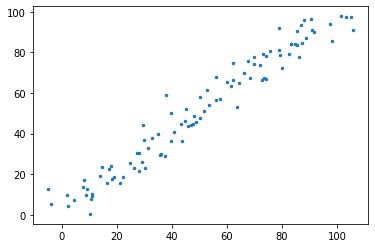

In [4]:
# Anzahl Messwerte
vals = 100

# Streuung der Messwerte
sigma = 5.0

# ZustandsÜbergangsmodel
dT = 1
A = np.array(
    [[1, 0, dT, 0],
     [0, 1, 0, dT],
     [ 0, 0, 1, 0],
     [0, 0, 0, 1]])

# Realer Zustand
x = np.array([[0],[0],[1],[1]])

# Messwerte generieren
data = generate_noisy_data(A, x, vals, sigma)

#Plot noisy data
plt.scatter(data[:,0],data[:,1], s=6)
plt.show()

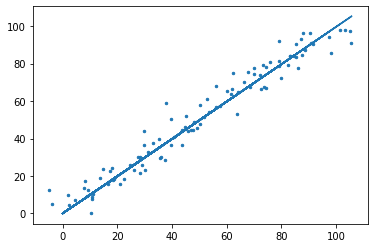

In [6]:
from numpy.linalg import multi_dot

x = np.array([[0],[0],[0],[0]])

# Nur die Position ist messbar, nicht die Geschwindigkeit
H = np.array([[1, 0, 0, 0],[0, 1, 0, 0]])

# Messrauschen
R = np.array([[sigma, 0],[0, sigma]])

# Systemrauschen
Q = np.array([[0.05, 0.12, 0.05, 0],[0, 0.01, 0, 0],[0, 0, 0.01, 0],[0, 0, 0, 0.01]])

# Kovarianz
P = np.ones(4)

# Implementieren Sie hier den Kalmanfilter
for i in range(vals): 

  #-------Prädiktion
  #1.
  x_prio = np.dot(A, x)
  #2.
  y = np.dot(H, x)
  #3.
  P = np.dot(A, np.dot(P, np.transpose(A))) + Q 

  #--------Korrektur
  #4.
  helper = np.dot(H, np.dot(P, H.transpose())) + R
  K = multi_dot([P, np.transpose(H), np.linalg.pinv(helper)])

  #5.
  x = x_prio + np.dot(K, ((np.asmatrix(data[i,:]).transpose())-y))
  #6.
  P = np.dot((np.ones(4)-np.dot(K, H)), P)


  #speichere daten
  data_kalman = np.empty(shape=[100, 4])
  data_kalman[i,:]=x.transpose()

plt.plot(data_kalman[:,0],data_kalman[:,1])
plt.scatter(data[:,0],data[:,1], s=6)
plt.show()
